In [42]:
from pythonping import ping
import pandas as pd
import time, os
import seaborn as sns

In [52]:
url = input("Bitte geben Sie die URL ein: ")
interval = int(input("Wie lange soll das Intervall der Abfragen sein (in Sekunden)? "))
file_name = "ping_test.csv"
direc = "Data"
file_path = direc+"/"+file_name

Bitte geben Sie die URL ein: www.google.com
Wie lange soll das Intervall der Abfragen sein (in Sekunden)? 5


In [33]:
if not "ping_test.csv" in os.listdir("./"+direc):
    df_my_ping = pd.DataFrame(columns=["date", "min", "max", "avg", "url"])
else:
    df_my_ping = pd.read_csv(file_path, index_col=0)

In [34]:
def get_ping_as_df(url):
    my_ping = ping(url)
    return pd.DataFrame({"date":[time.strftime("%d.%m.%Y %H:%M:%S",time.localtime())],
                        "min":[my_ping.rtt_min_ms],
                        "max": [my_ping.rtt_max_ms],
                        "avg":[my_ping.rtt_avg_ms],
                        "url":[url]})

In [53]:
# Ausführen in Infinit Loop und Catchen bei Keyboard Interrupt --> Dann persistent speichern
# Ausserdem alle 10 Minuten als csv file speichern.
try:
    while True:
        df_my_ping = df_my_ping.append(get_ping_as_df(url), ignore_index=True)
        if int(time.strftime("%M", time.localtime()))%10 == 0:
            df_my_ping.to_csv(file_path)
        time.sleep(interval)
except KeyboardInterrupt:
    print("Keyboard interrupt - saving files to ping_test.csv.")
    df_my_ping.to_csv(file_path)
            

Keyboard interrupt - saving files to ping_test.csv.


In [38]:
# Umwandeln aller Dates in das Format Datetime
df_my_ping["date"] = pd.to_datetime(df_my_ping["date"])

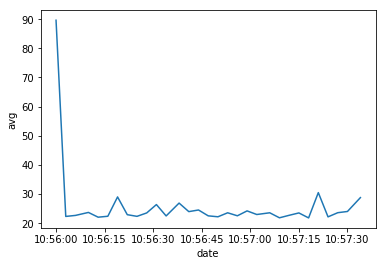

In [41]:
sns.lineplot(x=df_my_ping["date"], y=df_my_ping["avg"])